In [1]:
### Setting up the environment.

import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

allData = pd.read_csv('db_mlb_project_week2.csv')
allData['GameDate'] = pd.to_datetime(allData['GameDate'], format='%Y-%m-%d')

In [2]:
### Feature Engineering

# Offshift GameDate by 1
x1 = allData['GameDate'].values
x2 = np.hstack((x1[1:],x1[:1]))

# Create DaysRest Feature to represent the number of days rest given between the first game of statistical record and the decision game.
allData['NextGame'] = pd.to_datetime(pd.Series(x2, index=allData.index), format='%Y-%m-%d')
allData['DaysRest'] = (allData['NextGame'] - allData['GameDate']).astype('timedelta64[D]').astype(int)

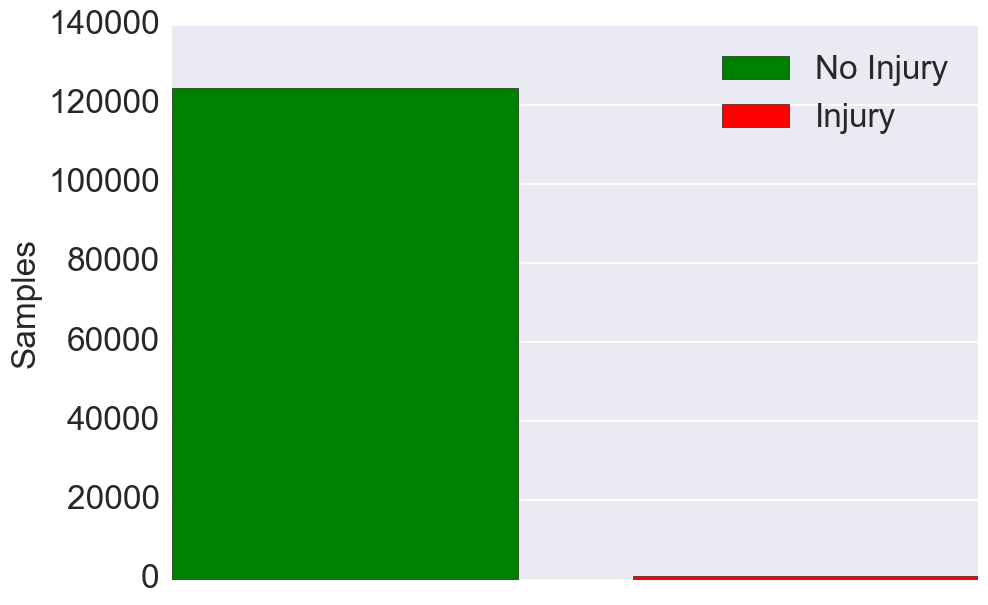

In [3]:
### Eliminate last game of pitcher's career.
### Eliminate pitchers with age 0.

someData1 = allData[allData['DaysRest']>0]
someData2 = someData1[someData1['ages']>0]
someData = someData2

### Downsample.
posData = someData.loc[someData.index[someData['targets'].values==1],:]
preNegData = someData.loc[someData.index[someData['targets'].values==0],:]
negData = preNegData.sample(int(sum(posData['targets'])))
frames = [negData, posData]
dsData = pd.concat(frames)

N = 2
ind = np.arange(N)
injured = len(posData)
width = 0.15
notInjured = len(allData)-len(posData)
a=plt.bar(0.1,notInjured, width, color='g')
b=plt.bar(0.3,injured, width, color='r')
#plt.rcParams['figure.figsize']=(5,8)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.ylabel('Samples',fontsize=24)
plt.yticks(fontsize=24)
plt.legend((a[0], b[0]), ('No Injury', 'Injury'),fontsize=24)
plt.show()

In [ ]:
bins = np.linspace(someData.ages.min(),someData.ages.max(),14)
ax1 = posData.ages.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.ages.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Age',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.DaysRest.min(),8,8)
ax1 = posData.DaysRest.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.DaysRest.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Days Rest',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.GSc.min(),someData.GSc.max(),14)
ax1 = posData.GSc.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.GSc.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Game Score ("WAR")',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
bins = np.linspace(someData.BB.min(),someData.BB.max(),12)
ax1 = posData.BB.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.BB.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('BB (Walks)',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

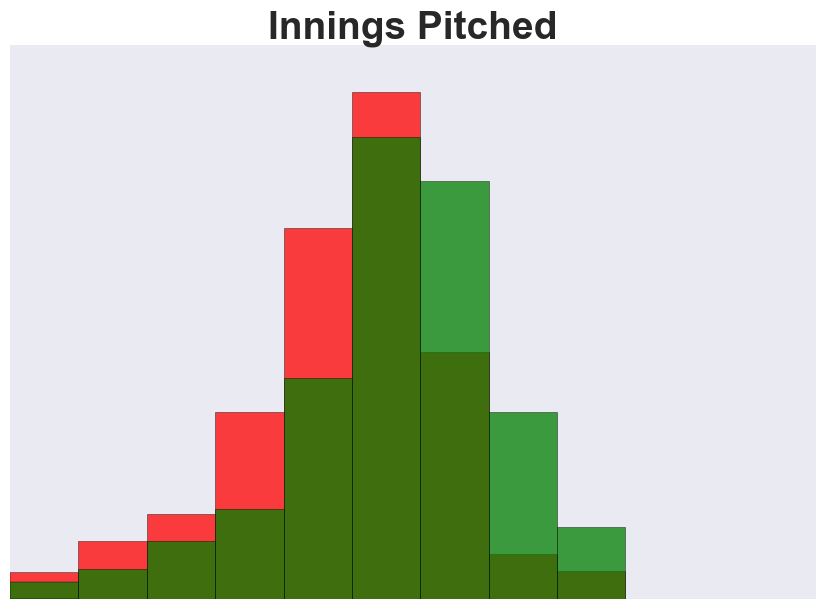

In [4]:
bins = np.linspace(someData.IP.min(),someData.IP.max(),12)
ax1 = posData.IP.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.IP.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Innings Pitched',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

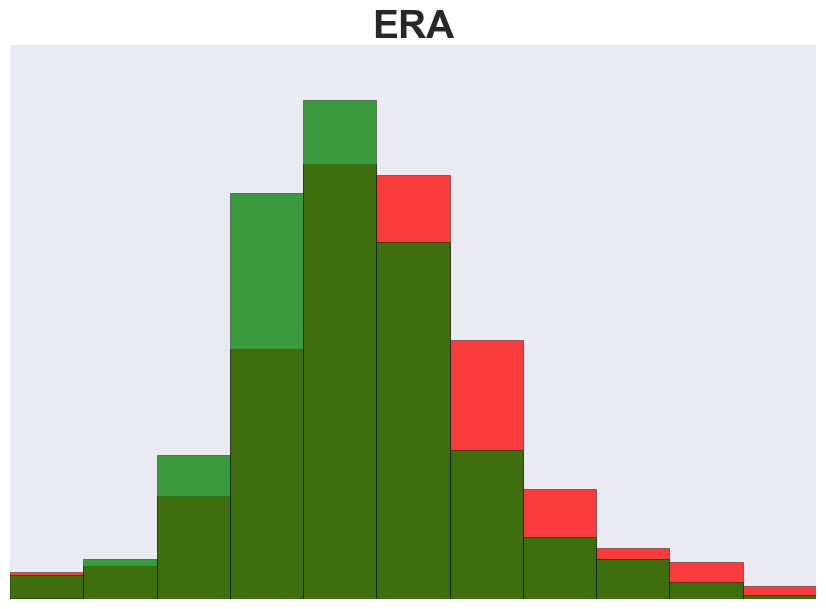

In [6]:
bins = np.linspace(someData.ERA.min(),10,12)
ax1 = posData.ERA.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.ERA.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('ERA',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

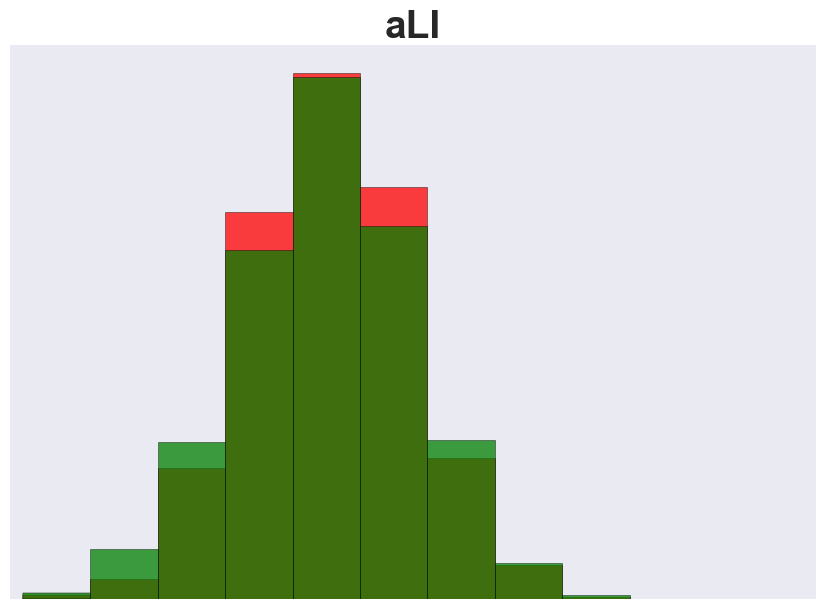

In [52]:
bins = np.linspace(someData.aLI.min(),someData.aLI.max(),12)
ax1 = posData.aLI.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.aLI.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('aLI',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

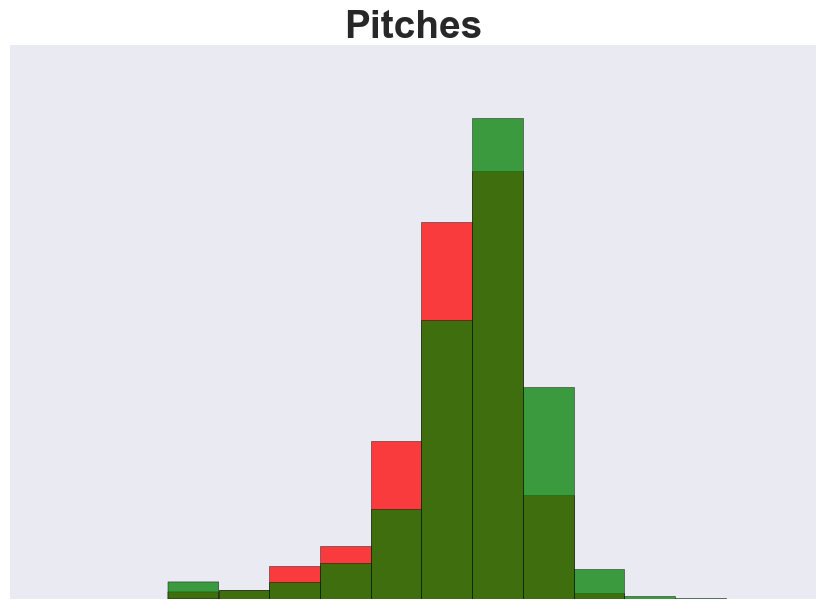

In [56]:
bins = np.linspace(someData.Pit.min(),someData.Pit.max(),12)
ax1 = posData.Pit.plot.hist(bins, alpha=0.75, label='Injured', color='red', normed=True)
ax2 = negData.Pit.plot.hist(bins, alpha=0.75, label='Healthy', color='green', normed=True)
plt.title('Pitches',fontsize=28,fontweight='bold')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:


corr = someData.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()

In [11]:
### Doing machine learning.
# First, a simple linear model.
from sklearn import model_selection, linear_model

X = dsData[['IP','ERA','ages','DaysRest','interceptRow']].values
y = dsData['targets'].values
cvss = model_selection.ShuffleSplit(n_splits=3, test_size=0.3)
logistic = linear_model.LogisticRegression()
scores_logistic = model_selection.cross_val_score(logistic, X, y, cv=cvss)
print scores_logistic.mean(), scores_logistic.std()
logistic.fit(X,y)
print logistic.coef_

0.601346801347 0.0236937536509
[[ -2.35562558e-01   1.28725070e-01   1.69431606e-02   6.08267090e-05
    1.47446822e-01]]


In [58]:
# Refine the linear model with normalization of well-behaved features
#    (NOT Days Rest)
# Add in a few new ones that are well-behaved.
X = dsData[['IP','ERA','ages','aLI','Pit','interceptRow']].values
X[:,2] = np.log(X[:,2])
def myNormalize(M):
    for col in range(M.shape[1]):
        mean = M[:,col].mean()
        std = M[:,col].std()
        meanCol = mean*np.ones((M.shape[0],1))
        stdCol = std*np.ones((M.shape[0],1))
        myCol = M[:,col].reshape(len(meanCol),1)
        myCol = (myCol-meanCol)/stdCol
        M[:,col] = myCol.reshape(len(meanCol))
    return M
Xt = X
Xt[:,:2] = myNormalize(Xt[:,:2])
y = dsData['targets'].values
cvss = model_selection.ShuffleSplit(n_splits=3, test_size=0.3)
logistic = linear_model.LogisticRegression()
scores_logistic = model_selection.cross_val_score(logistic, Xt, y, cv=cvss)
print scores_logistic.mean(), scores_logistic.std()
logistic.fit(Xt,y)
print logistic.coef_

0.618181818182 0.0178419411441
[[-0.44298854  0.26527174  0.1738632   0.22370136  0.0028958  -0.51585025]]


In [63]:
from sklearn.svm import SVC
#RandomizedSearchCV
Xt = X
Xt[:,:2] = myNormalize(Xt[:,:2])
y = dsData['targets'].values
cvss = model_selection.ShuffleSplit(n_splits=3, test_size=0.3)
logistic = SVC(kernel='rbf')
param_dist = {'C': np.logspace(-3,3,100), 'gamma': np.logspace(-5,2,100)}
n_iter = 100
random_search = model_selection.RandomizedSearchCV(logistic,param_distributions=param_dist,n_iter=n_iter)
random_search.fit(Xt,y)
scores_logistic = model_selection.cross_val_score(logistic, Xt, y, cv=cvss)
print random_search.grid_scores_

KeyboardInterrupt: 

0.0187664818548 0.00317134792841


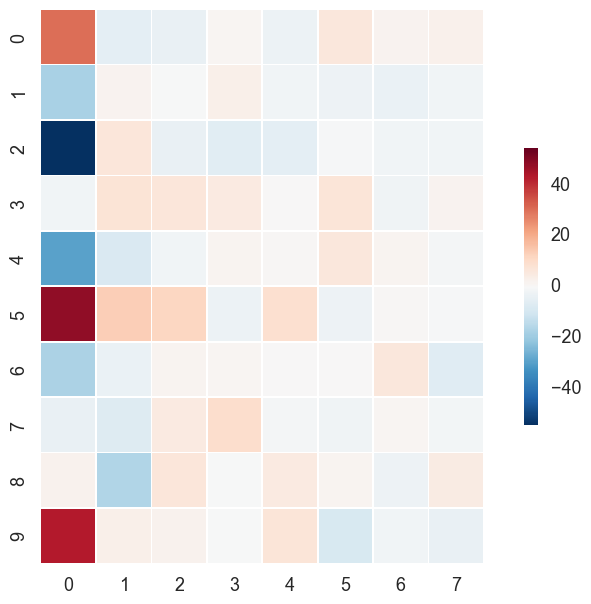

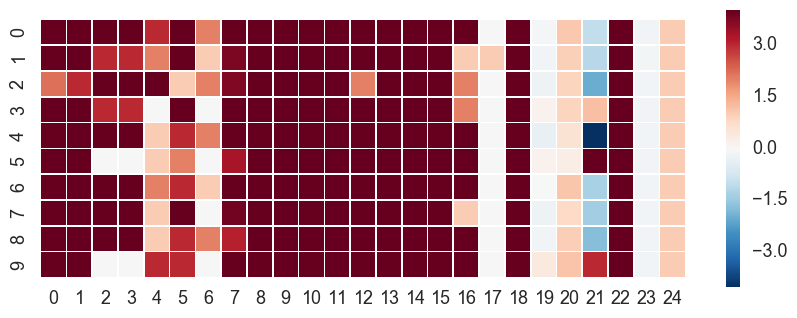

In [64]:
selData = dsData
X = selData[['IP','H','R','ER','BB','SO','HR','ERA','BF','Pit','Str','Ctct','StS','StL','GB','FB','LD','Unk', \
             'GSc','WPA','aLI','RE24','ages','DaysRest','interceptRow']].values
y = selData['targets'].values
Xlabels = ['IP','H','R','ER','BB','SO','HR','ERA','BF','Pit','Str','Ctct','StS','StL','GB','FB','LD','Unk', \
             'GSc','WPA','aLI','RE24','ages','DaysRest','interceptRow']
#selData.to_csv('temp.csv')
#model = RandomForestClassifier(n_estimators=30,max_depth=2)

from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
def myTransforms(Mat):
    M = Mat[:,:-1]
    #M[:,0] = normalize(M[:,0])
    #M[:,1] = normalize(np.log(M[:,1]))
    #M[:,3] = normalize(M[:,3])
    #longRest = M[:,2]>6
    #notLongRest = M[:,2]<=6
    #numLongRest = sum(longRest)
    #numNotLongRest = sum(notLongRest)
    #M[notLongRest,2] = np.zeros(1,numNotLongRest)
    #M[longRest,2] = np.ones(1,numLongRest)
    columns = range(M.shape[1])
    means = np.zeros(len(columns))
    stds = np.zeros(len(columns))
    for column in columns:
        mean_temp = M[:,column].mean()
        std_temp = M[:,column].std()
    means[column] = mean_temp
    stds[column] = std_temp
    M[:,column] = (M[:,column]-mean_temp)/std_temp
    M = np.concatenate((M,Mat[:,-1].reshape(-1,1)),axis=1)
    return M

ipca = IncrementalPCA(n_components=8)
ipca.fit(myTransforms(X))
Xt = ipca.transform(myTransforms(X))
cv = cross_validation.ShuffleSplit(len(y), n_iter=3, test_size=0.3)
logistic = linear_model.Lasso()
scores_logistic = cross_validation.cross_val_score(logistic, X, y, cv=cv)
print scores_logistic.mean(), scores_logistic.std()
#print type(X)
#logistic.fit(Xt,y)
sns.heatmap(Xt[:10,:],vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()
sns.heatmap(X[:10,:],vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()

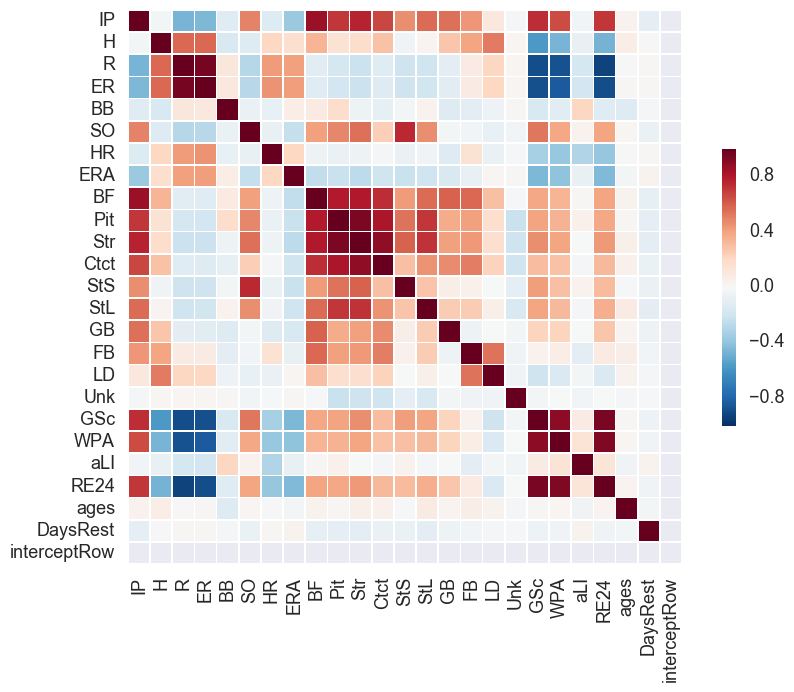

(1650, 25) 25


In [47]:
Xdf = pd.DataFrame(data=X,columns=Xlabels)
corr = Xdf.corr()
sns.heatmap(corr,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5},xticklabels=Xlabels,yticklabels=Xlabels)
plt.show()
print X.shape, len(Xlabels)

('ERA', 0.078549793528162409)
('ages', 0.064664911939873865)
('WPA', 0.058302789074742345)
('aLI', 0.056222735768883786)
('Pit', 0.055109744676374889)
('RE24', 0.054159452071515124)
('IP', 0.05387541414477285)
('Str', 0.053092009546386272)
('Ctct', 0.052607755861682891)
('GSc', 0.051455931381603641)
('BF', 0.042203273672900533)
('StL', 0.041926709340659916)
('GB', 0.039795855238031579)
('StS', 0.039050891935995452)
('FB', 0.038217816750423114)
('LD', 0.037575155870085711)
('DaysRest', 0.035084654902536684)
('H', 0.031451318654164701)
('SO', 0.030959101199600773)
('BB', 0.026045832405184322)
('ER', 0.022560312679256834)
('R', 0.020983165636161871)
('HR', 0.015199614842970071)
('Unk', 0.00090575887803033951)
('interceptRow', 0.0)


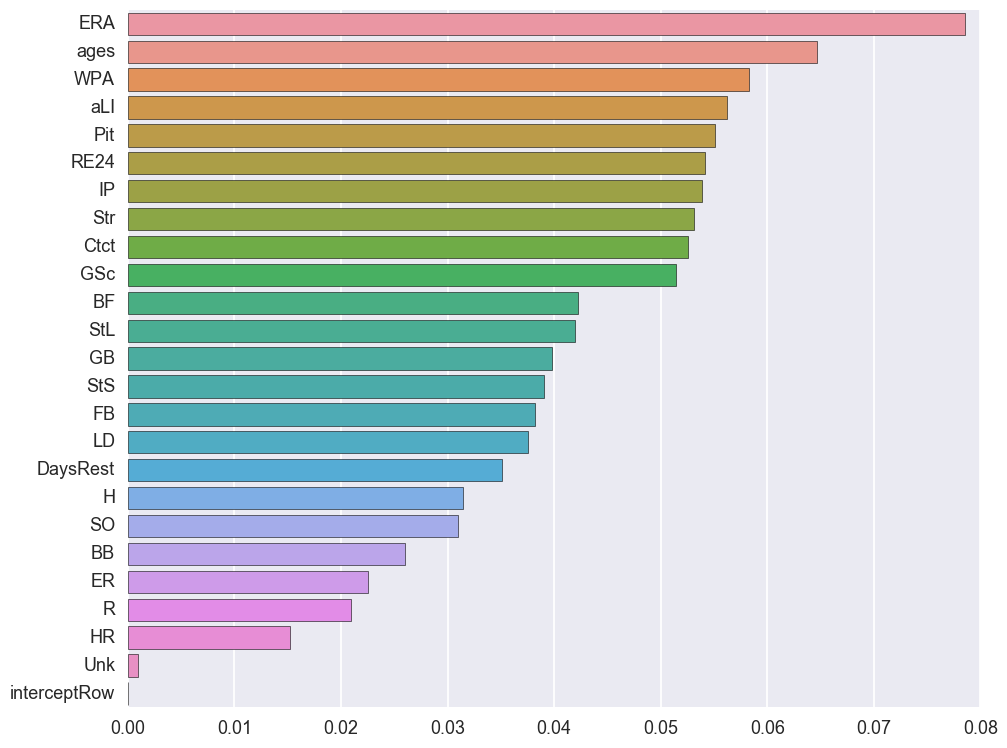

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X, y)
feature_importance = (np.vstack((np.arange(len(rfc.feature_importances_)), rfc.feature_importances_)).T)
ranking = feature_importance[feature_importance[:,1].argsort()[::-1]]
ranked_list = []
ranked_labels = []
for rank, importance in ranking:
    #print rank, importance
    print(Xlabels[int(rank)], importance)
    ranked_list.append(importance)
    ranked_labels.append(Xlabels[int(rank)])
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.barplot(x=ranked_list, y=ranked_labels)

plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=8)
ipca.fit(myTransforms(X))
print ipca.explained_variance_ratio_
sns.heatmap(ipca.components_,xticklabels=Xlabels,vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": .5})
plt.show()
print sum(ipca.explained_variance_ratio_)
print ipca.transform(myTransforms(X[:,:10]))

In [ ]:
if False:
    mySplits = 3
    kf = KFold(n_splits=mySplits,shuffle=True)
    j = 0

    for train_indices, test_indices in kf.split(X):
        features_train = X[train_indices,:]
        features_test = X[test_indices,:]
        targets_train = y.iloc[train_indices]
        targets_test = y.iloc[test_indices]
        features_train = features_train
        features_test = features_test
        
    #    targets_test = pd.Series(np.random.shuffle(targets_test.values), index=targets_test.index)
        model.fit(X,y)
    #    pred = model.predict_proba(features_test)
    ##    for i in range(len(thres_array)):
     #       true_pos = float(sum((pred[:,1] < thres_array[i]) & (targets_test == 0)))
    #  #      print true_pos
      #      true_pos /= len(targets_test)-sum(targets_test)
    #  #      false_pos = float(sum((pred[:,1] < thres_array[i]) & (targets_test == 1)))
      #      print false_pos
    #  #      false_pos /= len(targets_test)-(len(targets_test)-sum(targets_test))
      #      roc_array[i,0,j] = true_pos
    #  #      roc_array[i,1,j] = false_pos
      #  j += 1
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(targets_test, model.predict_proba(features_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', \
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    print model.coef_